In [65]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
X = pd.read_csv('encoded_scaled_features.csv')
y = pd.read_csv('classes.csv', names=['Class'])
#forgot and wrote row names (indices), so need to delete first col
X.drop('Unnamed: 0', axis = 1, inplace = True)

In [67]:
# Make train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33)
del X
del y

In [68]:
pca = PCA()
pca.fit(Xtrain)
pca_score = pca.explained_variance_ratio_
V = pca.components_

In [69]:
indices = [V.T * x/pca_score.min() for x in pca_score]

In [70]:
sort_cols = [x for (y,x) in sorted(zip(pca_score,Xtrain.columns), reverse=True)]
sort_pca = sorted(pca_score, reverse=True)

In [71]:
sort_cols

['Occupancy',
 'Loan Amount (000s)',
 'Population',
 'Minority Population %',
 'HUD Median Family Income',
 'Number of Owner-occupied units',
 'Number of 1- to 4-Family units',
 'Agency Code_1',
 'Agency Code_2',
 'Agency Code_3',
 'Agency Code_4',
 'Agency Code_5',
 'Agency Code_7',
 'Loan Type_1',
 'Loan Type_2',
 'Loan Type_3',
 'Loan Type_4',
 'Property Type_1',
 'Property Type_2',
 'Property Type_3',
 'Loan Purpose_1',
 'Loan Purpose_2',
 'Loan Purpose_3',
 'Preapproval_1',
 'Preapproval_2',
 'Preapproval_3',
 'Applicant Ethnicity_1',
 'Applicant Ethnicity_2',
 'Applicant Ethnicity_3',
 'Applicant Ethnicity_4',
 'Co Applicant Ethnicity_1',
 'Co Applicant Ethnicity_2',
 'Co Applicant Ethnicity_3',
 'Co Applicant Ethnicity_4',
 'Co Applicant Ethnicity_5',
 'Applicant Sex_1',
 'Applicant Sex_2',
 'Applicant Sex_3',
 'Applicant Sex_4',
 'Co Applicant Sex_1',
 'Co Applicant Sex_2',
 'Co Applicant Sex_3',
 'Co Applicant Sex_4',
 'Co Applicant Sex_5']

Feature ranking:
1. feature Occupancy (0.239321)
2. feature Loan Amount (000s) (0.135050)
3. feature Population (0.089684)
4. feature Minority Population % (0.085135)
5. feature HUD Median Family Income (0.078909)
6. feature Number of Owner-occupied units (0.066519)
7. feature Number of 1- to 4-Family units (0.038400)
8. feature Agency Code_1 (0.032717)
9. feature Agency Code_2 (0.030837)
10. feature Agency Code_3 (0.026746)
11. feature Agency Code_4 (0.023073)
12. feature Agency Code_5 (0.021025)
13. feature Agency Code_7 (0.017393)
14. feature Loan Type_1 (0.015826)
15. feature Loan Type_2 (0.014444)
16. feature Loan Type_3 (0.012061)
17. feature Loan Type_4 (0.011473)
18. feature Property Type_1 (0.010014)
19. feature Property Type_2 (0.009600)
20. feature Property Type_3 (0.007505)
21. feature Loan Purpose_1 (0.006856)
22. feature Loan Purpose_2 (0.006053)
23. feature Loan Purpose_3 (0.005290)
24. feature Preapproval_1 (0.004786)
25. feature Preapproval_2 (0.003604)
26. feature Pre

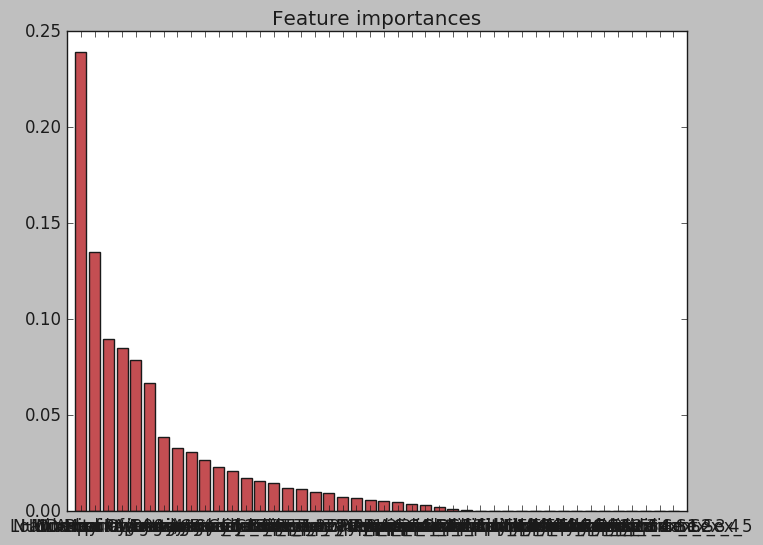

In [72]:
# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, sort_cols[f], sort_pca[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), sort_pca,
       color="r", align="center")
plt.xticks(range(Xtrain.shape[1]), sort_cols)
plt.xlim([-1, Xtrain.shape[1]])
plt.show()

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(n_jobs=6)
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(Xtrain, ytrain.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True False False False False False
 False False False  True False False  True False  True  True False  True
 False False False False False False False False False False False False
 False False  True False False False False False]
[ 9 13  7  1  1  1  1 23 29  2 22  3 33 28 21  1 20 10  1 11  1  1 24  1 30
 12 27  8 25  5 35 18 17 34 26 14 15 16  1 19  4 31  6 32]


In [82]:
for x in list(Xtrain.columns[rfe.support_].values):
    print(x)

Minority Population %
HUD Median Family Income
Number of Owner-occupied units
Number of 1- to 4-Family units
Loan Type_3
Property Type_2
Loan Purpose_1
Loan Purpose_2
Preapproval_1
Applicant Sex_4


In [83]:
mean_norm_loan_amnt = [Xtrain['Loan Amount (000s)'][(ytrain==x).values.ravel()].values.mean() for x in range(2)]
std_norm_loan_amnt = [Xtrain['Loan Amount (000s)'][(ytrain==x).values.ravel()].values.std() for x in range(2)]

In [84]:
mean_norm_loan_amnt

[0.0019063163580255963, 0.0020380838323549805]

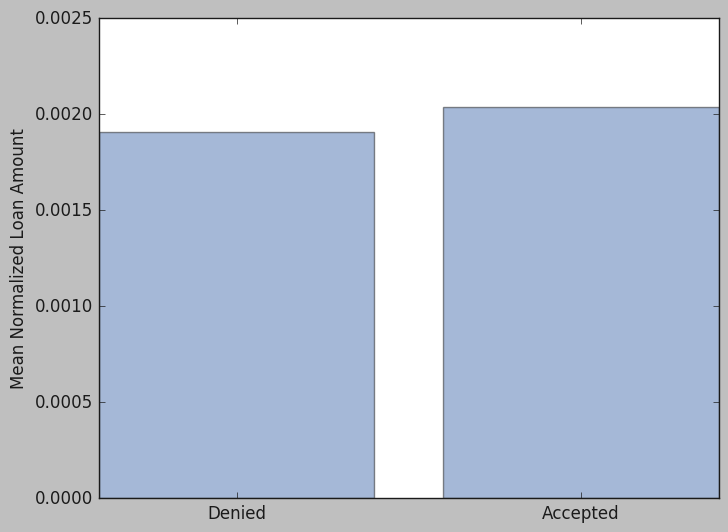

In [87]:
objects = ('Denied', 'Accepted')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, mean_norm_loan_amnt, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Normalized Loan Amount')
 
plt.show()

In [88]:
mean_norm_min_perc_amnt = [Xtrain['Minority Population %'][(ytrain==x).values.ravel()].values.mean() for x in range(2)]
std_norm_min_perc_amnt = [Xtrain['Minority Population %'][(ytrain==x).values.ravel()].values.std() for x in range(2)]

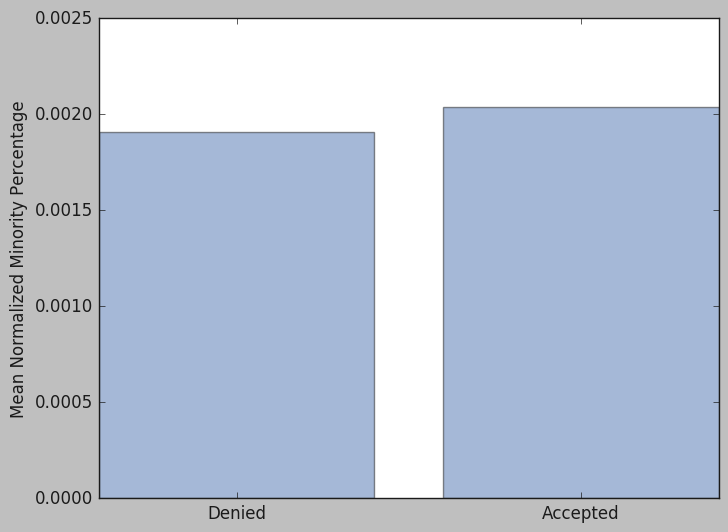

In [89]:
objects = ('Denied', 'Accepted')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, mean_norm_loan_amnt, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Normalized Minority Percentage')
 
plt.show()

In [79]:
for x in [1,3,2,6,5,4]:
    print(Xtrain.columns[x])

Loan Amount (000s)
Minority Population %
Population
Number of 1- to 4-Family units
Number of Owner-occupied units
HUD Median Family Income
